# Age and Gender Prediction

In [27]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.applications import Xception
from tensorflow import keras
from keras.layers import *
from keras.models import Model
from keras.utils import plot_model
import numpy as np
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping

In [28]:
img = 'data/45_0_0_20170108231358834.jpg.chip.jpg'

In [29]:
img_ = cv2.imread(img)

In [30]:
len(os.listdir('data'))

4149

In [31]:
img_

array([[[ 77,  97,  92],
        [ 77,  97,  92],
        [ 79,  96,  93],
        ...,
        [133, 195, 189],
        [133, 195, 189],
        [131, 195, 189]],

       [[ 79,  99,  94],
        [ 79,  99,  94],
        [ 81,  98,  95],
        ...,
        [131, 193, 187],
        [131, 193, 187],
        [129, 193, 187]],

       [[ 82, 102,  97],
        [ 82, 102,  97],
        [ 84, 101,  98],
        ...,
        [128, 190, 184],
        [129, 191, 185],
        [127, 191, 185]],

       ...,

       [[ 38,  62,  68],
        [ 30,  52,  57],
        [ 24,  44,  49],
        ...,
        [101,  79,  73],
        [103,  79,  73],
        [103,  79,  73]],

       [[ 33,  51,  58],
        [ 28,  47,  52],
        [ 27,  43,  49],
        ...,
        [101,  79,  73],
        [100,  78,  72],
        [100,  78,  72]],

       [[ 29,  45,  52],
        [ 26,  42,  48],
        [ 31,  43,  49],
        ...,
        [100,  78,  72],
        [100,  78,  72],
        [ 99,  77,  71]]

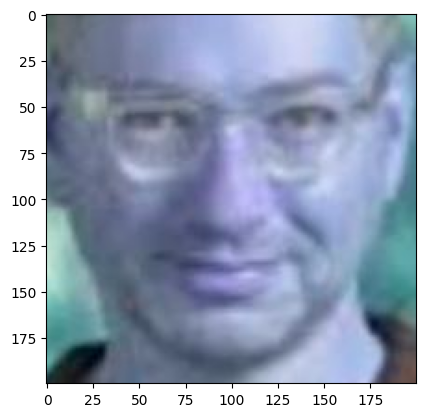

In [32]:
plt.imshow(img_)

## Preparing data

In [33]:
os.listdir('data')[0].split('_')

['10', '0', '0', '20161220222308131.jpg.chip.jpg']

In [34]:
data = os.listdir('data')
random.shuffle(data)

for pictures in data:
    file_path = os.path.join('data',pictures)
    age =int(pictures.split('_')[0])
    gender = int(pictures.split('_')[1])

    # print(age,gender,file_path)


In [35]:
data = os.listdir('data')
random.shuffle(data)

df_lst = []

for pictures in data:
    file_path = os.path.join('data',pictures)
    age =int(pictures.split('_')[0])
    gender = int(pictures.split('_')[1])

    df_lst.append({'file_path':file_path,'age':age,'gender':gender})

df = pd.DataFrame(df_lst)

In [36]:
df

,file_path,age,gender
0,data\32_0_0_20170104200937337.jpg.chip.jpg,32,0
1,data\31_0_3_20170104231444482.jpg.chip.jpg,31,0
2,data\40_1_1_20170109003603180.jpg.chip.jpg,40,1
3,data\34_0_0_20170104204349707.jpg.chip.jpg,34,0
4,data\20_1_3_20170104222022391.jpg.chip.jpg,20,1
...,...,...,...
4144,data\32_1_2_20170104170327891.jpg.chip.jpg,32,1
4145,data\42_0_4_20170104202505130.jpg.chip.jpg,42,0
4146,data\37_1_0_20170104172432171.jpg.chip.jpg,37,1
4147,data\35_1_0_20170104181325301.jpg.chip.jpg,35,1


0
0
AxesSubplot(0.125,0.53;0.227941x0.35)
0
1
AxesSubplot(0.398529,0.53;0.227941x0.35)
0
2
AxesSubplot(0.672059,0.53;0.227941x0.35)
1
0
AxesSubplot(0.125,0.11;0.227941x0.35)
1
1
AxesSubplot(0.398529,0.11;0.227941x0.35)
1
2
AxesSubplot(0.672059,0.11;0.227941x0.35)


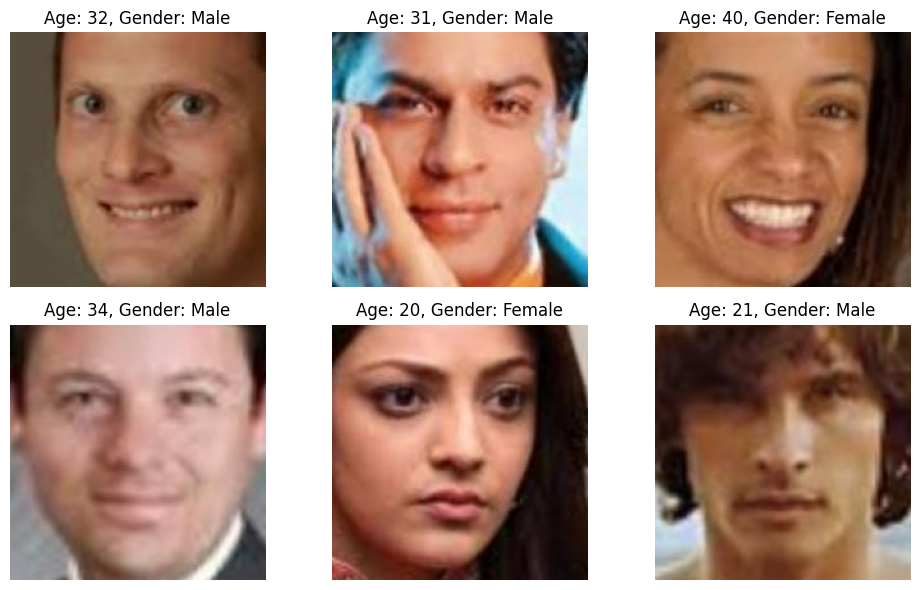

In [37]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for index, img in enumerate(df['file_path'][:6]):
    img_ = cv2.imread(img)

    row = index // 3
    col = index % 3
    print(row)
    print(col)
    axs[row, col].imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')
    axs[row, col].set_title(f'Age: {df["age"][index]}, Gender: {"Male" if df["gender"][index] == 0 else "Female"}')
    # axs[row, col].set_title(f' {axs[row, col]}')
    print(axs[row, col])

plt.tight_layout()
plt.show()



> ## Model Training


In [38]:
X = df['file_path']
y = df[['age','gender']]

In [39]:
y , X

(      age  gender
 0      32       0
 1      31       0
 2      40       1
 3      34       0
 4      20       1
 ...   ...     ...
 4144   32       1
 4145   42       0
 4146   37       1
 4147   35       1
 4148   29       0
 
 [4149 rows x 2 columns],
 0       data\32_0_0_20170104200937337.jpg.chip.jpg
 1       data\31_0_3_20170104231444482.jpg.chip.jpg
 2       data\40_1_1_20170109003603180.jpg.chip.jpg
 3       data\34_0_0_20170104204349707.jpg.chip.jpg
 4       data\20_1_3_20170104222022391.jpg.chip.jpg
                            ...                    
 4144    data\32_1_2_20170104170327891.jpg.chip.jpg
 4145    data\42_0_4_20170104202505130.jpg.chip.jpg
 4146    data\37_1_0_20170104172432171.jpg.chip.jpg
 4147    data\35_1_0_20170104181325301.jpg.chip.jpg
 4148    data\29_0_0_20170103182336026.jpg.chip.jpg
 Name: file_path, Length: 4149, dtype: object)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)


In [41]:
print('The dimension of the X_train dataset is:', X_train.shape)
print('The dimension of the X_test dataset is:', X_test.shape)
print('The dimension of the y_train dataset is:', y_train.shape)
print('The dimension of the y_tset dataset is:', y_test.shape)


The dimension of the X_train dataset is: (3319,)
The dimension of the X_test dataset is: (830,)
The dimension of the y_train dataset is: (3319, 2)
The dimension of the y_tset dataset is: (830, 2)


In [42]:
# input dimentions
input_dims = (64, 64, 3)

In [43]:
# Input layer
input_layer = Input(shape=(input_dims),name='Input_layer')


# Convolutional layers
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
batchnorm1 = BatchNormalization()(conv1)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1)
batchnorm2 = BatchNormalization()(conv2)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)
flatten = Flatten()(maxpool2)


# output layer-age
age_dense = Dense(
    units=128,activation='relu')(flatten)
age_output = Dense(
    units=1,activation='linear',name = 'age_output')(age_dense)

# output Layer-gender
gender_dense = Dense(
    units=128,activation='relu')(flatten)
gender_output = Dense(
    units=1,activation='sigmoid',name = 'gender_output')(gender_dense)


In [44]:
# Model 
model = Model(inputs = input_layer,outputs = [age_output,gender_output])

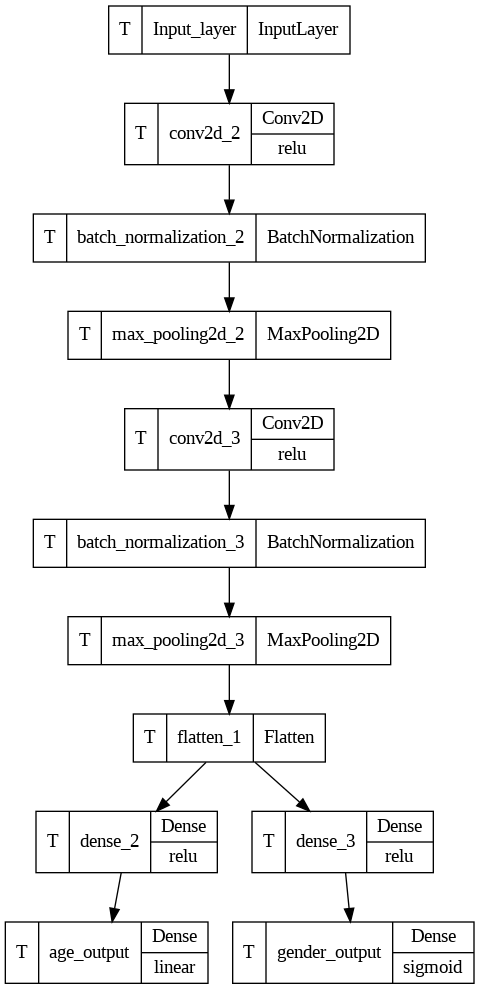
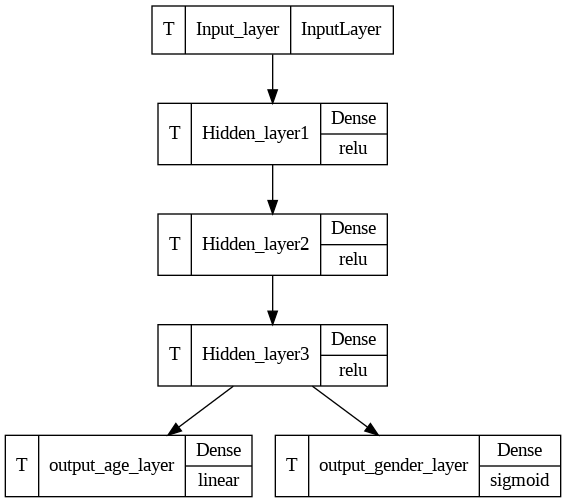

In [45]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_layer (InputLayer)       [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 62, 62, 32)   896         ['Input_layer[0][0]']            
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 62, 62, 32)  128         ['conv2d_2[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 31, 31, 32)  0           ['batch_normalization_2[0][

In [46]:
# Compile the model
model.compile(optimizer='adam',
              loss={'age_output': 'mae',
                    'gender_output': 'binary_crossentropy'},
              metrics={'age_output': 'accuracy',
                      'gender_output': 'accuracy'})


In [47]:
print('The dimension of the X_train dataset is:', X_train.shape)
print('The dimension of the X_test dataset is:', X_test.shape)
print('The dimension of the y_train dataset is:', y_train.shape)
print('The dimension of the y_tset dataset is:', y_test.shape)



The dimension of the X_train dataset is: (3319,)
The dimension of the X_test dataset is: (830,)
The dimension of the y_train dataset is: (3319, 2)
The dimension of the y_tset dataset is: (830, 2)


In [48]:
y_train['age']

2868    44
2473    27
1662    17
3135    43
1551    30
        ..
3444    15
466     38
3092    37
3772    18
860     16
Name: age, Length: 3319, dtype: int64

In [49]:
# Load and preprocess training images
X_train_processed = []
for img_path in X_train:
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img)
    X_train_processed.append(img_array)
X_train_processed = np.array(X_train_processed)

# Load and preprocess test images
X_test_processed = []
for img_path in X_test:
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img)
    X_test_processed.append(img_array)
X_test_processed = np.array(X_test_processed)


In [50]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=7,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [51]:
# Train the model
history = model.fit(x=X_train_processed,
                    y={'age_output': y_train['age'], 'gender_output': y_train['gender']},
                    batch_size=32,
                    epochs=30,
                    validation_data=(X_test_processed, {'age_output': y_test['age'], 'gender_output': y_test['gender']}),
                    callbacks=callback)


Epoch 1/30
104/104 [==============================] - 19s 160ms/step - loss: 8.5206 - age_output_loss: 7.9047 - gender_output_loss: 0.6159 - age_output_accuracy: 0.0000e+00 - gender_output_accuracy: 0.8102 - val_loss: 12.6905 - val_age_output_loss: 12.3017 - val_gender_output_loss: 0.3888 - val_age_output_accuracy: 0.0000e+00 - val_gender_output_accuracy: 0.8289
Epoch 2/30
104/104 [==============================] - 16s 154ms/step - loss: 6.1809 - age_output_loss: 5.9209 - gender_output_loss: 0.2600 - age_output_accuracy: 0.0000e+00 - gender_output_accuracy: 0.8948 - val_loss: 13.2962 - val_age_output_loss: 12.6982 - val_gender_output_loss: 0.5980 - val_age_output_accuracy: 0.0000e+00 - val_gender_output_accuracy: 0.7169
Epoch 3/30
104/104 [==============================] - 16s 153ms/step - loss: 5.4198 - age_output_loss: 5.2262 - gender_output_loss: 0.1936 - age_output_accuracy: 0.0000e+00 - gender_output_accuracy: 0.9162 - val_loss: 6.1555 - val_age_output_loss: 5.7410 - val_gender_ou

Text(0.5, 1.0, 'val_loss- 0.487 and loss- 0.042')

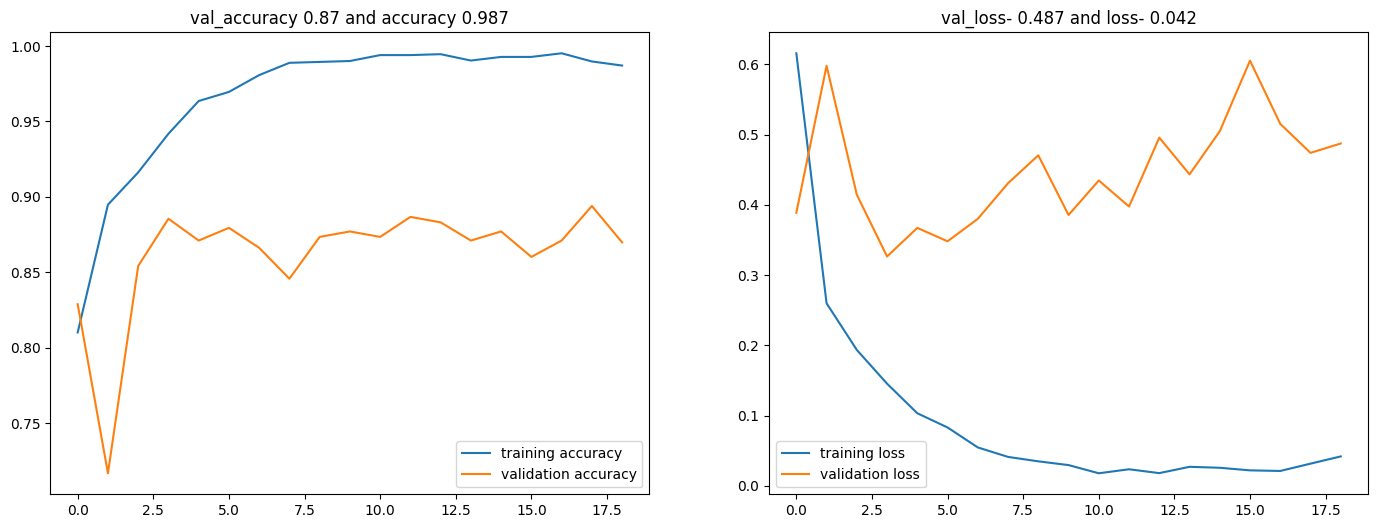

In [55]:
plt.subplots(nrows=1,ncols=2,figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(history.history['gender_output_accuracy'])
plt.plot(history.history['val_gender_output_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_gender_output_accuracy"][18],ndigits=3)} and accuracy {round(history.history["gender_output_accuracy"][18],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['gender_output_loss'])
plt.plot(history.history['val_gender_output_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_gender_output_loss"][18],ndigits=3)} and loss- {round(history.history["gender_output_loss"][18],ndigits=3)}')

Text(0.5, 1.0, 'val_loss- 5.854 and loss- 2.158')

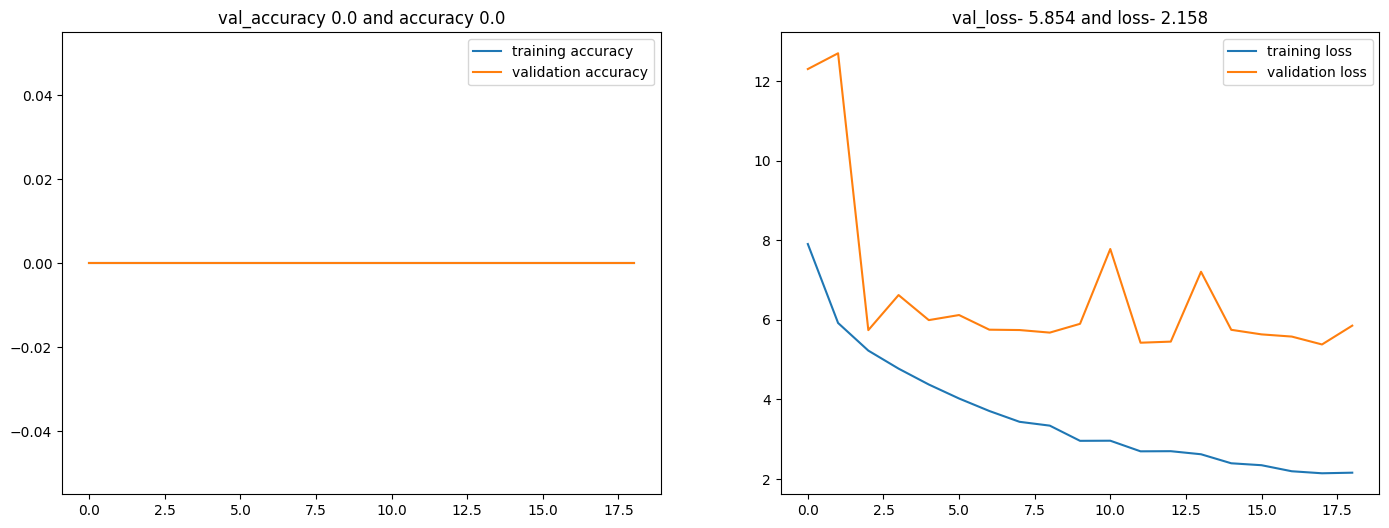

In [56]:
plt.subplots(nrows=1,ncols=2,figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(history.history['age_output_accuracy'])
plt.plot(history.history['val_age_output_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_age_output_accuracy"][18],ndigits=3)} and accuracy {round(history.history["age_output_accuracy"][18],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['age_output_loss'])
plt.plot(history.history['val_age_output_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_age_output_loss"][18],ndigits=3)} and loss- {round(history.history["age_output_loss"][18],ndigits=3)}')

In [57]:
# Save Model
model.save('Age&Gender-Prediction.H5')

INFO:tensorflow:Assets written to: Age&Gender-Prediction.H5\assets


INFO:tensorflow:Assets written to: Age&Gender-Prediction.H5\assets
